<a href="https://colab.research.google.com/github/mffg1993/RandomOpticalTools/blob/main/ExampleToCurveFit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 0. Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Step 1: Simulate Some Data
In real experiments, you'd read data from a file. Here, we'll simulate noisy data for learning.

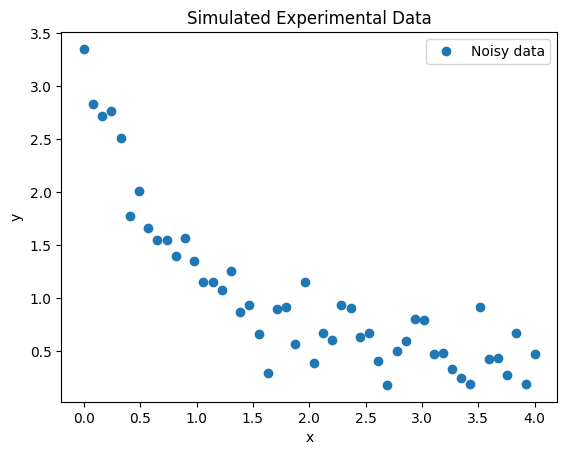

In [2]:
# True function: y = a * exp(-b * x) + c
def true_func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Simulated x data
x_data = np.linspace(0, 4, 50)

# Generate noisy y data
np.random.seed(0)
y_data = true_func(x_data, a=2.5, b=1.3, c=0.5) + 0.2 * np.random.normal(size=len(x_data))

plt.plot(x_data, y_data, 'o', label='Noisy data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simulated Experimental Data')
plt.legend()
plt.show()


## Step 2: Define the Model You Expect

In [4]:
# Same form as true_func, but we don't know the parameters
def model_func(x, a, b, c):
    return a * np.exp(-b * x) + c

## Step 3: Fit the Curve

In [5]:
# Fit the model to the data
popt, pcov = curve_fit(model_func, x_data, y_data)

# popt contains optimal values for a, b, c
print("Fitted parameters:", popt)


Fitted parameters: [2.80720814 1.24568449 0.44517316]


## Step 4: Plot the Fit

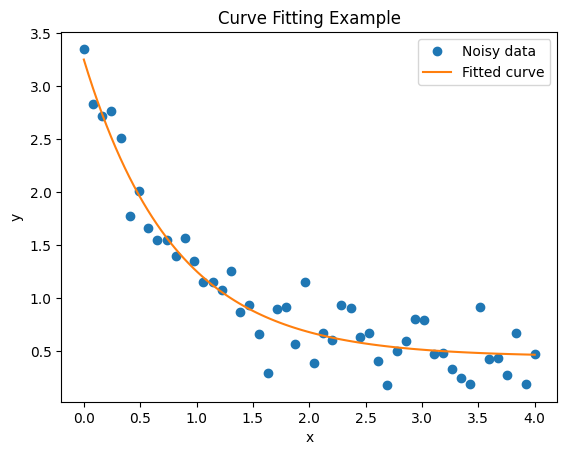

In [6]:
# Plot original data
plt.plot(x_data, y_data, 'o', label='Noisy data')

# Plot fitted curve
x_fit = np.linspace(0, 4, 100)
y_fit = model_func(x_fit, *popt)
plt.plot(x_fit, y_fit, '-', label='Fitted curve')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Curve Fitting Example')
plt.legend()
plt.show()